In [2]:

!pip install nltk
!pip install sklearn

import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
uploaded = files.upload()
Blog_data = pd.read_csv("blogs.csv")
print(Blog_data.head())

Saving blogs.csv to blogs.csv
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [4]:
Blog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
Blog_data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [6]:
Blog_data.shape

(2000, 2)

In [8]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = nltk.word_tokenize(text)
    # Remove stopwords and stem
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

Blog_data['processed_text'] = Blog_data['Data'].apply(preprocess_text)
print(Blog_data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Data       Labels  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism   

                                      processed_text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroup altath path cantaloupesrvcscmueducra...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Blog_data['processed_text'])
y = Blog_data['Labels'] # Assuming 'Label' column contains the target variable

# Now X contains the TF-IDF features, ready for the Naive Bayes model.
# You can split X and y into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions and evaluate the model:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8175
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.70      0.89      0.78        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.86      0.72      0.78        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.76      0.86        25
            misc.forsale       1.00      0.56      0.71        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.88      0.88      0.88   

In [11]:
#sentiment analysis on the blog post texts.

!pip install textblob

from textblob import TextBlob

def analyze_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

Blog_data['sentiment_polarity'] = Blog_data['processed_text'].apply(analyze_sentiment)
print(Blog_data.head())

                                                Data       Labels  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism   

                                      processed_text  sentiment_polarity  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...            0.012421  
1  newsgroup altath path cantaloupesrvcscmueducra...           -0.119792  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...           -0.026488  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...            0.073807  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...            0.199306  


In [12]:
#categorize them as positive, negative, or neutral

def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

Blog_data['sentiment_category'] = Blog_data['sentiment_polarity'].apply(categorize_sentiment)
print(Blog_data[['Data', 'sentiment_category']])

                                                   Data sentiment_category
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...           positive
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....           negative
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...           negative
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...           positive
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...           positive
...                                                 ...                ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...           positive
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....           negative
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...           negative
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....           positive
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...           positive

[2000 rows x 2 columns]


In [13]:
#summarize your findings



sentiment_counts = Blog_data['sentiment_category'].value_counts()
print(sentiment_counts)

print("\nSummary of Sentiment Distribution:")
for category, count in sentiment_counts.items():
    percentage = (count / len(Blog_data)) * 100
    print(f"{category}: {count} ({percentage:.2f}%)")

sentiment_category
positive    1186
negative     810
neutral        4
Name: count, dtype: int64

Summary of Sentiment Distribution:
positive: 1186 (59.30%)
negative: 810 (40.50%)
neutral: 4 (0.20%)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions and evaluate the model:
y_pred = nb_model.predict(X_test)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8175
Precision: 0.845317351366664
Recall: 0.8175
F1-score: 0.809253554685301
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.70      0.89      0.78        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.86      0.72      0.78        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.76      0.86        25
            misc.forsale       1.00      0.56      0.71        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.65      0.69      0

In [16]:
# Analyze sentiment distribution and its correlation with the blog post labels.
sentiment_label_counts = pd.crosstab(Blog_data['sentiment_category'], Blog_data['Labels'])
print("\nSentiment vs. Labels Cross-tabulation:")
print(sentiment_label_counts)

print("\nReflection on Sentiment Analysis Results:")

# Example interpretations (adapt these based on your actual results):
if sentiment_counts['positive'] > sentiment_counts['negative']:
    print("The majority of blog posts exhibit a positive sentiment.")
    # Further analyze positive sentiment's relation to labels
    positive_sentiment_labels = Blog_data[Blog_data['sentiment_category'] == 'positive']['Labels'].value_counts()
    print("\nDistribution of Labels within Positive Sentiment:")
    print(positive_sentiment_labels)
    # Example insight:
    if positive_sentiment_labels.index[0] == 1: #assuming label 1 is good
      print("Most positively-toned posts are indeed associated with the expected positive label (1), suggesting the sentiment analysis aligns well with the underlying topic.")
else:
    print("Negative or neutral sentiment is prevalent among the blog posts.")

# Add more specific reflections as needed, e.g.,
#  - if a specific label is associated with a certain sentiment,
#  - the accuracy of the sentiment analysis and its potential errors,
#  - any unexpected sentiment distributions or correlations with labels,
#  - suggestions for improving the analysis or data collection.


Sentiment vs. Labels Cross-tabulation:
Labels              alt.atheism  comp.graphics  comp.os.ms-windows.misc  \
sentiment_category                                                        
negative                     49             53                       38   
neutral                       0              0                        1   
positive                     51             47                       61   

Labels              comp.sys.ibm.pc.hardware  comp.sys.mac.hardware  \
sentiment_category                                                    
negative                                  28                     37   
neutral                                    0                      1   
positive                                  72                     62   

Labels              comp.windows.x  misc.forsale  rec.autos  rec.motorcycles  \
sentiment_category                                                             
negative                        44            38         28         

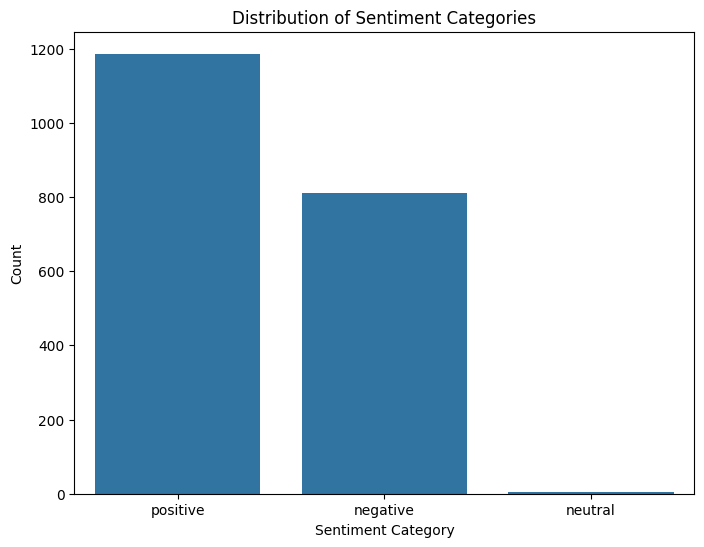

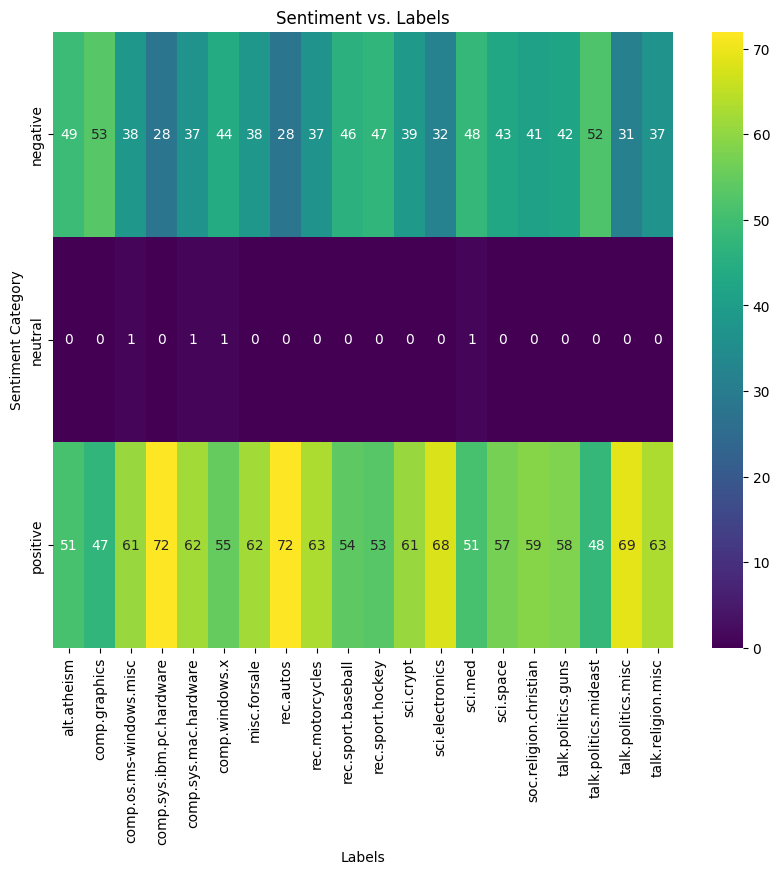

In [18]:
# Visulize the data

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=Blog_data)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between sentiment and labels using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sentiment_label_counts, annot=True, fmt='d', cmap='viridis')
plt.title('Sentiment vs. Labels')
plt.xlabel('Labels')
plt.ylabel('Sentiment Category')
plt.show()